In [1]:
#Les imports 

%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from utils import *
import pickle

from sklearn import preprocessing

from dataset_prepare import load_dataset, test_train_sets

2024-04-05 09:03:54.855333: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-05 09:03:55.311178: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 09:03:55.311219: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 09:03:55.350510: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-05 09:03:55.430884: I tensorflow/core/platform/cpu_feature_guar

In [2]:
df_2 = load_dataset()
label = 'mortal'

In [3]:
# Récupération des ensembles de train/test
X_train, X_test, y_train, y_test = test_train_sets(df_2)
df_2 = df_2.drop(columns='Num_Acc')

In [4]:
# valeurs catégorielles
categorical_features = ['trajet', 'catr', 'circ', 'nbv', 'prof',
                        'plan', 'surf', 'vma', 'lum', 'agg', 
                        'int', 'atm', 'col', 'catv', 'obs', 'obsm', 'choc', 'pieton',
                        'sexe_conducteur', 'infra', 'situ']
# valeurs numériques
numerical_features = ['mois', 'dep','age']

print("numerical : ", numerical_features)
print("categorical : ", categorical_features)

numerical :  ['mois', 'dep', 'age']
categorical :  ['trajet', 'catr', 'circ', 'nbv', 'prof', 'plan', 'surf', 'vma', 'lum', 'agg', 'int', 'atm', 'col', 'catv', 'obs', 'obsm', 'choc', 'pieton', 'sexe_conducteur', 'infra', 'situ']


In [5]:
from utils import custom_RFC

clf = pickle.load(open('models/rfc_reweight_model.sav', 'rb'))
preds = clf.predict(X_test)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9794546974471096, 0.7555738243998684)

In [45]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
tn, fp, fn, tp

(25980, 2737, 1012, 681)

In [46]:
import plotly.express as px

fig = px.imshow([[tn, fp], [fn, tp]], text_auto=True, labels=dict(y="Truth", x="Pred"),
                x=["False", "True"],
                y=["False", "True"]
               )
fig.show()

- RandomForest: 26326, 3009, 1002, 702

In [47]:
encoders = {cat_col:preprocessing.LabelEncoder() for cat_col in categorical_features}

for cat_col in categorical_features:
  df_2[cat_col] = encoders[cat_col].fit_transform(df_2[cat_col])
  print(cat_col)
  for idx in sorted(df_2[cat_col].unique()):
    print(idx, encoders[cat_col].inverse_transform([idx]))

trajet
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
catr
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
circ
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
nbv
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
7 [7]
8 [8]
9 [9]
10 [10]
11 [11]
12 [12]
13 [13]
prof
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
plan
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
surf
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
7 [7]
8 [8]
vma
0 [0]
1 [1]
2 [2]
3 [3]
lum
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
agg
0 [0]
1 [1]
int
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
7 [7]
8 [8]
9 [9]
atm
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
7 [7]
8 [8]
9 [9]
col
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
7 [7]
catv
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
obs
0 [0]
1 [1]
obsm
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
7 [7]
choc
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
7 [7]
8 [8]
9 [9]
10 [10]
pieton
0 [0]
1 [1]
sexe_conducteur
0 [0]
1 [1]
infra
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
7 [7]
8 [8]
9 [9]
10 [10]
situ
0 [0]
1 [1]
2 [2]
3 [3]
4 [4]
5 [5]
6 [6]
7 [7]


In [48]:
def compute_stat(preds, sensitive, value=None, not_value=None):
    if value is not None:
      preds_sel = preds[sensitive == value]
    elif not_value is not None:
      preds_sel = preds[sensitive != not_value]
    else:
      print("one of 'value' and 'not value' must be set")
      return None, None, None, None
    card = len(preds_sel)
    card_pos = len(preds_sel[preds_sel == 1])
    card_neg = len(preds_sel[preds_sel == 0])
    return card, card_pos, card_neg, preds_sel


def compute_baserate(preds, sensitive=X_test["sexe_conducteur"], value=0):

    n_F, n_F_pos, n_F_neg, preds_F = compute_stat(preds=preds, sensitive=sensitive, value=value)
    n_M, n_M_pos, n_M_neg, preds_M = compute_stat(preds=preds, sensitive=sensitive, not_value=value)

    DI = n_F_pos/n_F*n_M/n_M_pos
    p_DI = np.min([DI, 1/DI])
    DP = n_F_pos/n_F - n_M_pos/n_M

    ret = {}
    ret["disparate_impact"] = DI
    ret["P_rule_disparate_impact"] = p_DI
    ret["demography_parity"] = DP

    return ret

In [49]:
preds = clf.predict(X_test)
for att,unpriv in zip(['sexe_conducteur', 'pieton'],[0, 1]):
  value = encoders[att].transform([unpriv])[0]
  base_rate_pred = compute_baserate(preds, sensitive=X_test[att], value=value)
  base_rate_label = compute_baserate(y_test, sensitive=X_test[att], value=value)
  print(att, unpriv)
  for k,v in base_rate_pred.items():
    print(k, v, base_rate_label[k])

sexe_conducteur 1
disparate_impact 1.8730382750687555 1.5733869178937117
P_rule_disparate_impact 0.5338919195141871 0.6355715740529335
demography_parity 0.05970891928764807 0.022439373005842936
pieton 1
disparate_impact 0.7408452770992654 1.0800450805571133
P_rule_disparate_impact 0.7408452770992654 0.9258872782274753
demography_parity -0.029870565100473853 0.004422364056385214


In [27]:
import pickle

data_test = X_test.copy(deep=True)
data_test["Y"] = y_test

data_test.to_csv("test_data.csv",
          index=False)

data_train = X_train.copy(deep=True)
data_train["Y"] = y_train

data_train.to_csv("train_data.csv",
          index=False)

with open( 'clf.pickle', 'wb' ) as f:
    pickle.dump(clf, f )

In [12]:
import dice_ml
from dice_ml.utils import helpers
from IPython.core.display import HTML

In [13]:
train_dataset = X_train.copy(deep=True)
train_dataset[label] = y_train

d = dice_ml.Data(dataframe=train_dataset, continuous_features=numerical_features, outcome_name=label)

m = dice_ml.Model(model=clf, backend="sklearn")

exp = dice_ml.Dice(d, m, method="random")

In [14]:
# valeurs prédites vraies
p = []
predict = clf.predict(X_test)
for i in range(0, len(predict)):
    if predict[i] == 1.:
        p.append(i)

In [15]:
for i in range(0, 5):
    r = random.randint(0, 1000)
    e1 = exp.generate_counterfactuals(X_test[p[r]:p[r]+1], total_CFs=10, desired_class="opposite")
    e1.visualize_as_dataframe(show_only_changes=True)
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    imp = exp.local_feature_importance(X_test[p[i]:p[i]+1], cf_examples_list=e1.cf_examples_list)
    print(imp.local_importance)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Query instance (original outcome : 0)


,trajet,catr,circ,nbv,prof,plan,surf,infra,situ,vma,...,atm,col,catv,obs,obsm,choc,pieton,sexe_conducteur,age,mortal
0,1,5,2,4,2,1,1,0,1,2,...,1,6,3,0,1,3,1,1,44,0



Diverse Counterfactual set (new outcome: 1)


,trajet,catr,circ,nbv,prof,plan,surf,infra,situ,vma,...,atm,col,catv,obs,obsm,choc,pieton,sexe_conducteur,age,mortal
0,-,-,-,-,-,-,-,-,-,4,...,-,-,-,-,-,-,-,0,-,-
1,-,-,-,-,-,-,-,-,-,3,...,-,-,-,-,-,-,-,-,-,-
2,0,-,-,-,1,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
3,-,3,-,-,-,-,-,-,-,1,...,-,-,0,-,-,-,-,-,-,1
4,-,1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5,5,-,-,6,-,-,-,-,-,4,...,-,-,-,-,-,-,-,-,-,-
6,-,-,1,-,-,-,-,-,-,1,...,-,-,-,-,-,-,-,-,-,-
7,4,-,-,-,4,-,-,-,-,3,...,-,-,-,-,-,-,-,-,-,1
8,2,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,6,-,-,-,1
9,-,1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


[{'vma': 0.6, 'trajet': 0.4, 'catr': 0.3, 'prof': 0.2, 'circ': 0.1, 'nbv': 0.1, 'catv': 0.1, 'choc': 0.1, 'sexe_conducteur': 0.1, 'plan': 0.0, 'surf': 0.0, 'infra': 0.0, 'situ': 0.0, 'lum': 0.0, 'agg': 0.0, 'int': 0.0, 'atm': 0.0, 'col': 0.0, 'obs': 0.0, 'obsm': 0.0, 'pieton': 0.0, 'mois': 0.0, 'dep': 0.0, 'age': 0.0}]


100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

Query instance (original outcome : 0)


,trajet,catr,circ,nbv,prof,plan,surf,infra,situ,vma,mois,lum,dep,agg,int,atm,col,catv,obs,obsm,choc,pieton,sexe_conducteur,age,mortal
0,0,1,3,4,1,2,1,3,1,4,3,1,1,1,9,1,6,0,0,1,7,1,1,60,0



Diverse Counterfactual set (new outcome: 1)


,trajet,catr,circ,nbv,prof,plan,surf,infra,situ,vma,mois,lum,dep,agg,int,atm,col,catv,obs,obsm,choc,pieton,sexe_conducteur,age,mortal
0,-,-,-,-,-,-,-,-,-,-,-,3,-,-,-,-,-,3,-,-,-,-,-,-,-
1,-,-,-,-,-,-,-,-,-,-,-,-1,-,-,-,-,-,-,-,-,0,-,-,-,1
2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,5,-,-,-,1
3,-,-,-,-,-,-,-,-,-,-,-,2,-,-,-,-,-,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-,-,-,-,3,-,-,-,-,-,-,-,-,-,-,-,-,-
5,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,4,-,-,-,1
6,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1
7,-,-,-,-,-,-,-,-,-,-,-,-1,-,-,-1,-,-,-,-,-,-,-,-,-,-
8,-,-,-,-,-,-,-,-,-,-,-,-1,-,-,-,-,-,-,-,-,-,-,-,-,1
9,-,-,-,-,-,-,-,-,-,-,-,5,-,-,-,-,-,-,-,-,-,-,-,-,1


[{'lum': 0.7, 'choc': 0.3, 'int': 0.1, 'catv': 0.1, 'trajet': 0.0, 'catr': 0.0, 'circ': 0.0, 'nbv': 0.0, 'prof': 0.0, 'plan': 0.0, 'surf': 0.0, 'infra': 0.0, 'situ': 0.0, 'vma': 0.0, 'agg': 0.0, 'atm': 0.0, 'col': 0.0, 'obs': 0.0, 'obsm': 0.0, 'pieton': 0.0, 'sexe_conducteur': 0.0, 'mois': 0.0, 'dep': 0.0, 'age': 0.0}]


100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

Query instance (original outcome : 0)


,trajet,catr,circ,nbv,prof,plan,surf,infra,situ,vma,mois,lum,dep,agg,int,atm,col,catv,obs,obsm,choc,pieton,sexe_conducteur,age,mortal
0,5,3,2,3,2,4,1,0,1,3,5,1,34,1,1,7,1,3,0,2,3,0,1,54,0



Diverse Counterfactual set (new outcome: 1)


,trajet,catr,circ,nbv,prof,plan,surf,infra,situ,vma,mois,lum,dep,agg,int,atm,col,catv,obs,obsm,choc,pieton,sexe_conducteur,age,mortal
0,-,-,-,-,3,-1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,4,-,-,-,1
1,-,-,-,-,4,-1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1
2,-,-,-,-,3,-1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1
3,-,-,-,-,4,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1
4,-,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1
5,-,-,-,-,-1,1,-,-,-,-,-,-,70,-,-,-,-,-,-,-,-,-,-,-,1
6,-,-,-,-,1,-1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1
7,-,-,-,-,1,3,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1
8,-,-,-,-,-1,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1
9,-,-,-,-,-,-,-,-,-,-,11,-,-,-,-,-,-,-,-,-,-,-,-,-,-


[{'prof': 0.9, 'plan': 0.8, 'choc': 0.1, 'mois': 0.1, 'dep': 0.1, 'trajet': 0.0, 'catr': 0.0, 'circ': 0.0, 'nbv': 0.0, 'surf': 0.0, 'infra': 0.0, 'situ': 0.0, 'vma': 0.0, 'lum': 0.0, 'agg': 0.0, 'int': 0.0, 'atm': 0.0, 'col': 0.0, 'catv': 0.0, 'obs': 0.0, 'obsm': 0.0, 'pieton': 0.0, 'sexe_conducteur': 0.0, 'age': 0.0}]


100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

Query instance (original outcome : 0)


,trajet,catr,circ,nbv,prof,plan,surf,infra,situ,vma,mois,lum,dep,agg,int,atm,col,catv,obs,obsm,choc,pieton,sexe_conducteur,age,mortal
0,0,3,2,2,2,1,2,0,1,3,10,1,45,1,1,1,6,3,0,1,2,1,1,52,0



Diverse Counterfactual set (new outcome: 1)


,trajet,catr,circ,nbv,prof,plan,surf,infra,situ,vma,mois,lum,dep,agg,int,atm,col,catv,obs,obsm,choc,pieton,sexe_conducteur,age,mortal
0,-,-,-,-,-,-,-,-,-,-,-,5,-,-,-,-,-,-,-,-,-,-,-,-,-
1,-,-,-,-1,-,-,-,-,-,-,-,-1,-,-,-,-,-,-,-,-,-,-,-,-,1
2,-,-,-,-,-,-,7,-,-,-,-,-1,-,-,-,-,-,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-,-,-,-,-1,-,-,-,-,-,-,1,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-,-,-,-,2,-,-,-,-,-,-,-,-,-,-,-,-,-
5,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
6,-,-,-,-,-,-,-,-,-,-,-,2,-,-,-,-,-,-,-,-,-,-,-,-,-
7,-,-,-,4,-,-,-,-,-,-,-,-1,-,-,-,-,-,-,-,-,-,-,-,-,1
8,-,-,-,6,-,-,-,-,-,-,-,4,-,-,-,-,-,-,-,-,-,-,-,-,1
9,-,-,-,-,-,-,-,-,-,-,-,4,-,-,-,-,-,-,-,-,-,-,-,-,-


[{'lum': 0.9, 'nbv': 0.3, 'surf': 0.1, 'obs': 0.1, 'trajet': 0.0, 'catr': 0.0, 'circ': 0.0, 'prof': 0.0, 'plan': 0.0, 'infra': 0.0, 'situ': 0.0, 'vma': 0.0, 'agg': 0.0, 'int': 0.0, 'atm': 0.0, 'col': 0.0, 'catv': 0.0, 'obsm': 0.0, 'choc': 0.0, 'pieton': 0.0, 'sexe_conducteur': 0.0, 'mois': 0.0, 'dep': 0.0, 'age': 0.0}]


100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

Query instance (original outcome : 0)


,trajet,catr,circ,nbv,prof,plan,surf,infra,situ,vma,mois,lum,dep,agg,int,atm,col,catv,obs,obsm,choc,pieton,sexe_conducteur,age,mortal
0,5,3,2,2,1,2,1,0,1,3,4,2,27,1,1,1,5,3,0,9,3,0,1,22,0



Diverse Counterfactual set (new outcome: 1)


,trajet,catr,circ,nbv,prof,plan,surf,infra,situ,vma,mois,lum,dep,agg,int,atm,col,catv,obs,obsm,choc,pieton,sexe_conducteur,age,mortal
0,-,-,-,-,-,-1,-,-,-,1,-,3,-,-,-,-,-,-,1,-,-,-,-,-,1
1,-,-,-,-,-,-1,-,-,-,1,10,3,-,-,-,-,-,-,1,-,-,-,-,-,1
2,-,-,-,-,-,-1,-,-,-,1,10,3,-,-,-,-,3,-,1,-,-,-,-,-,1
3,0,-,-,-,-,-,-,-1,-,-,5,-,-,-,-,-,-,-,-,6,-,-,-,73,-
4,-,-,-,-,-,-1,-,-,-,1,10,3,-,-,-,-,3,-,1,-,-,-,-,-,1
5,-,-,-,-,-,-,8,-,-,-,11,-,-,2,-,-,-,-,1,-,4,-,-,-,1
6,-,-,-,-,-,-1,-,-,-,-,5,-,-,2,-,-,4,-,1,-,9,-,0,46,-
7,-,-,-,-,-,-,8,-,-,-,11,-,-,2,-,-,-,-,1,-,4,1,-,-,1
8,1,-,-,7,-,-,-,-,-,-,-,4,-,-,-,-,-,0,-,-,-,-,-,62,1
9,-,-,-,-,-,4,-,-,6,2,-,-,-,-,-,-,4,0,1,-,6,-,-,34,1


[{'obs': 0.8, 'mois': 0.7, 'plan': 0.6, 'vma': 0.5, 'lum': 0.5, 'col': 0.4, 'choc': 0.4, 'age': 0.4, 'agg': 0.3, 'trajet': 0.2, 'surf': 0.2, 'catv': 0.2, 'nbv': 0.1, 'infra': 0.1, 'situ': 0.1, 'obsm': 0.1, 'pieton': 0.1, 'sexe_conducteur': 0.1, 'catr': 0.0, 'circ': 0.0, 'prof': 0.0, 'int': 0.0, 'atm': 0.0, 'dep': 0.0}]


In [16]:
# t prend les entrées qui donne une sortie 1
# t2 prend le reste
t = []
t2 = []
for i in range(0, len(preds)):
    if preds[i] == 1:
        t.append(i)
    else:
        t2.append(i)

In [17]:
# Calcul de shap en parallèle pour 10 valeurs
# Ici pour les sorties données 1
s = parallel_shap(data_test, X_train, clf, t, n_iter=10)
s2 = parallel_shap(data_test, X_train, clf, t2, n_iter=10)

In [ ]:
# Démarrage calculs
s.start_shap()
s2.start_shap()

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:58: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:72: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:104: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



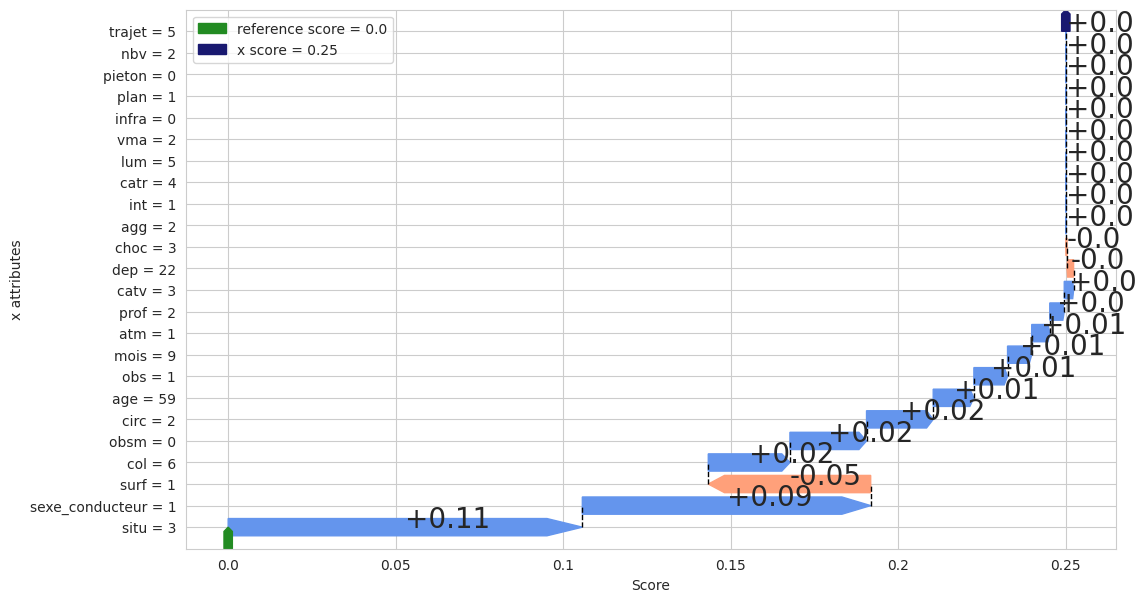

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:58: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:72: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:104: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



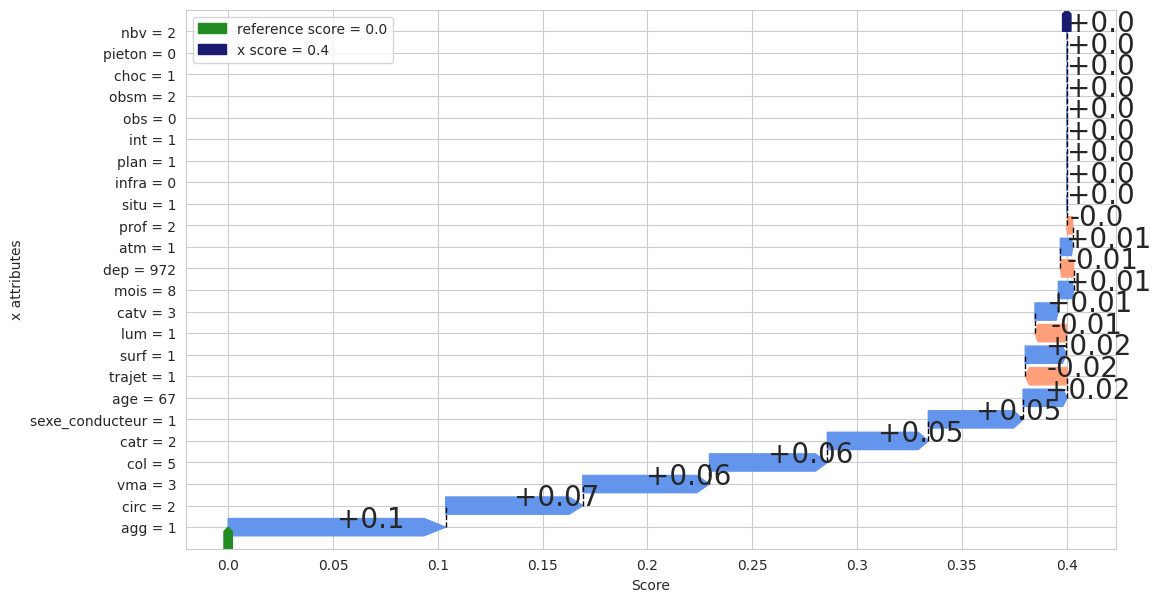

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:58: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:72: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:104: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



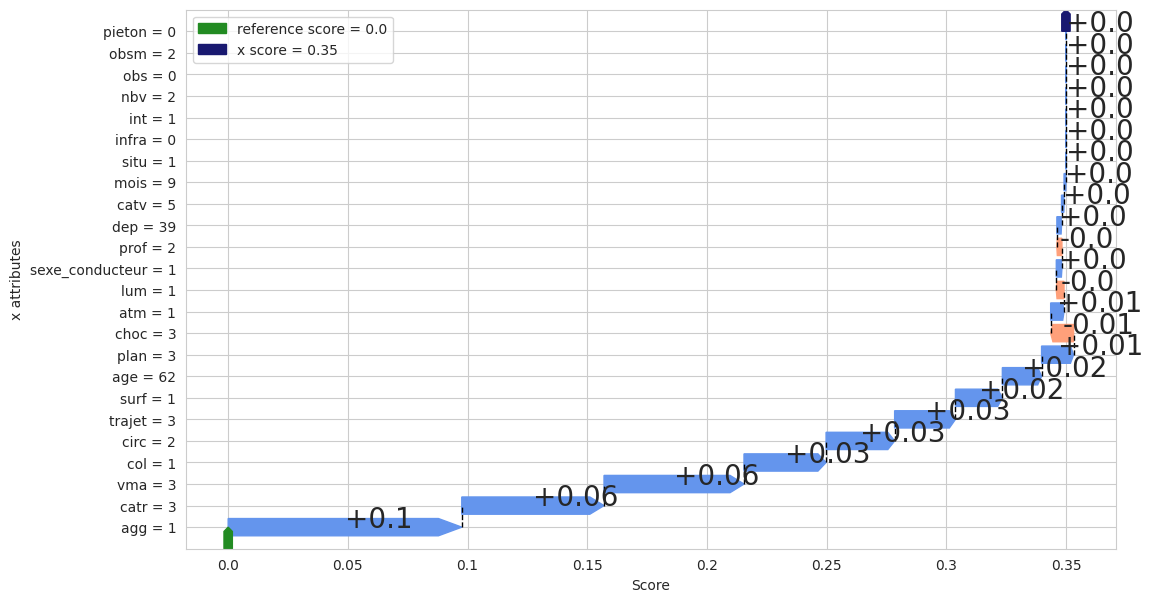

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:58: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:72: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:104: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



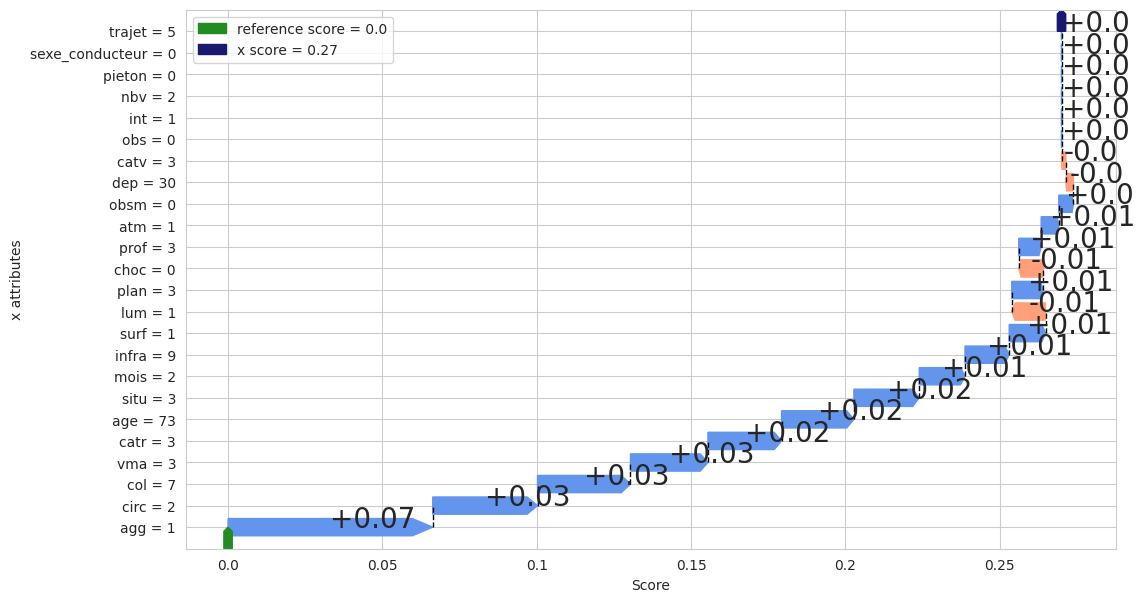

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:58: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:72: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:104: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



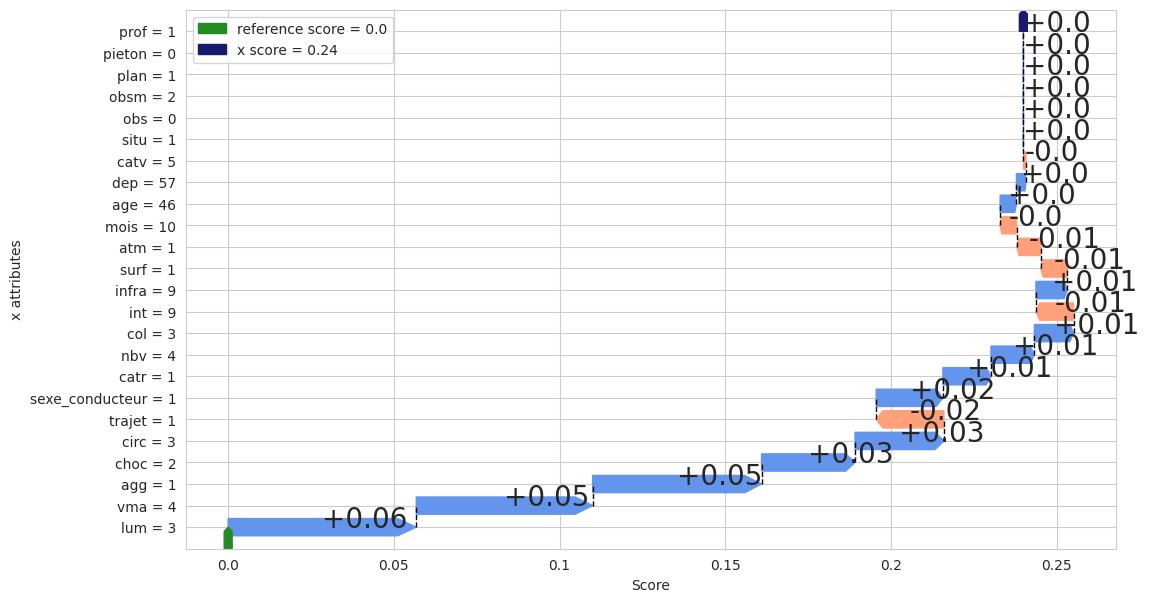

In [19]:
from shapkit.plots import plot_shapley

# Affichage des résultats
for i in range(0, 5):
    true_shap, query_instance, reference = s.results[i]
    fig = plot_shapley(x=query_instance, fc=s.fc, ref=reference, shapley_values=true_shap, n_attributes=24)

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:58: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:72: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:104: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



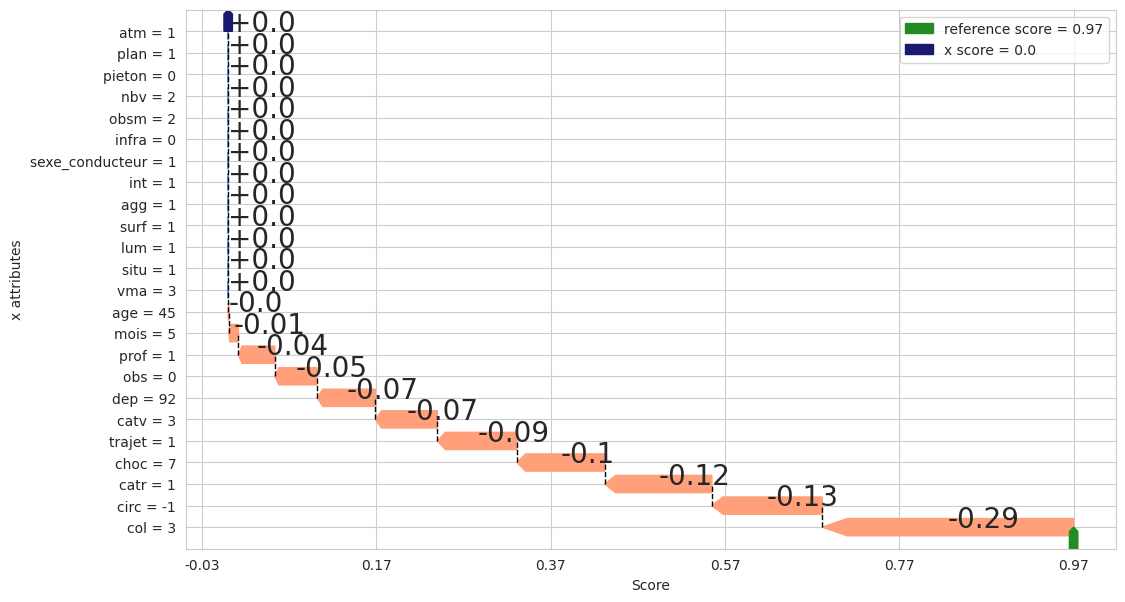

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:58: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:72: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:104: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



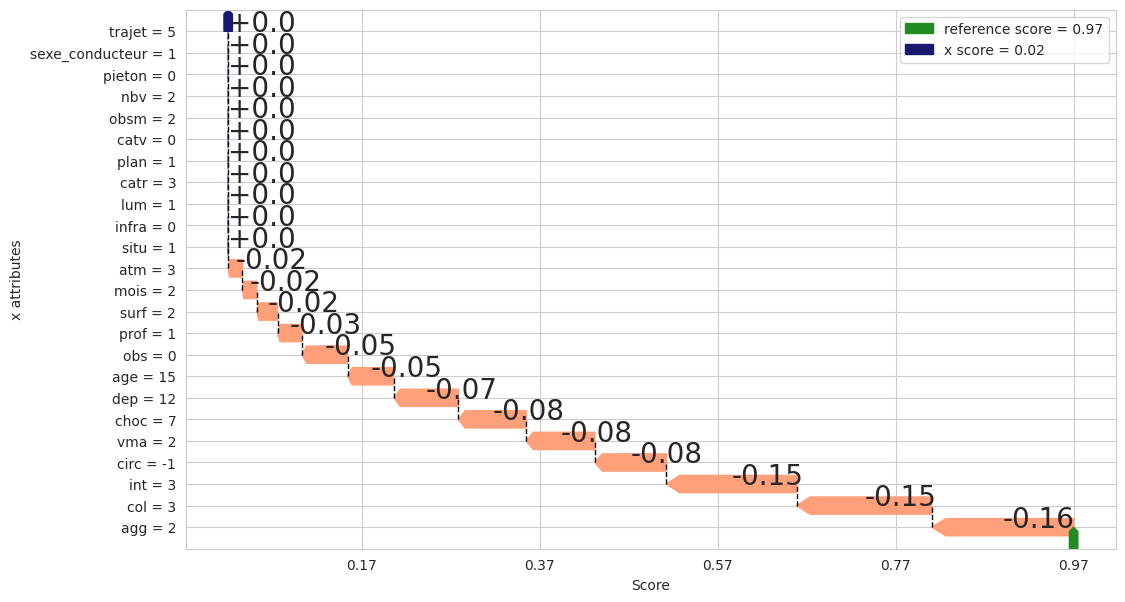

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:58: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:72: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:104: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



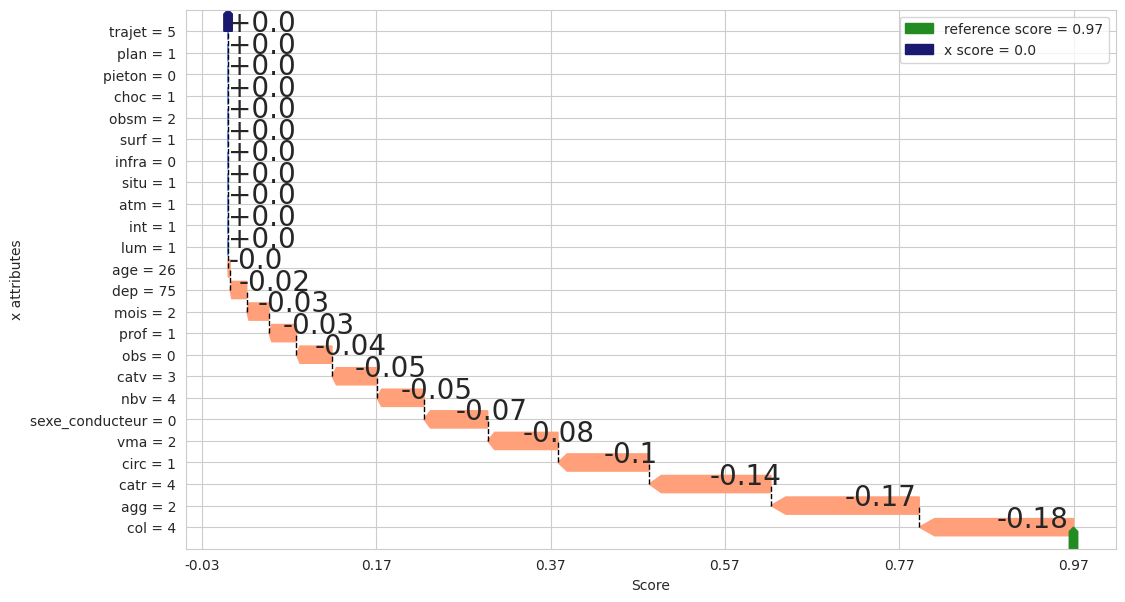

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:58: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:72: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:104: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



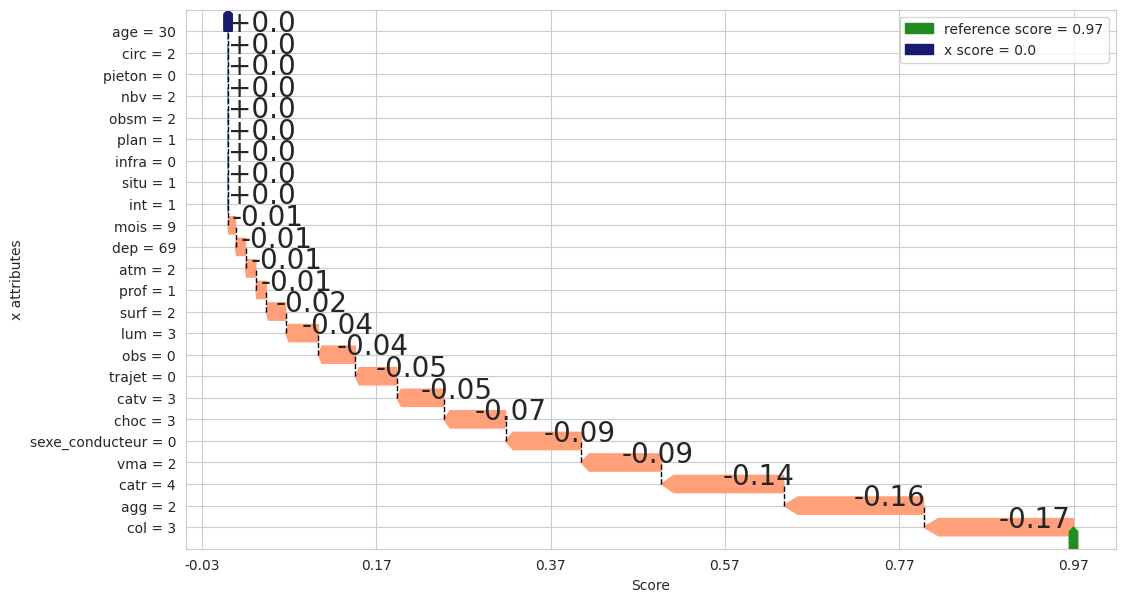

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:58: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:72: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/erwan/.local/lib/python3.10/site-packages/shapkit/plots.py:104: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



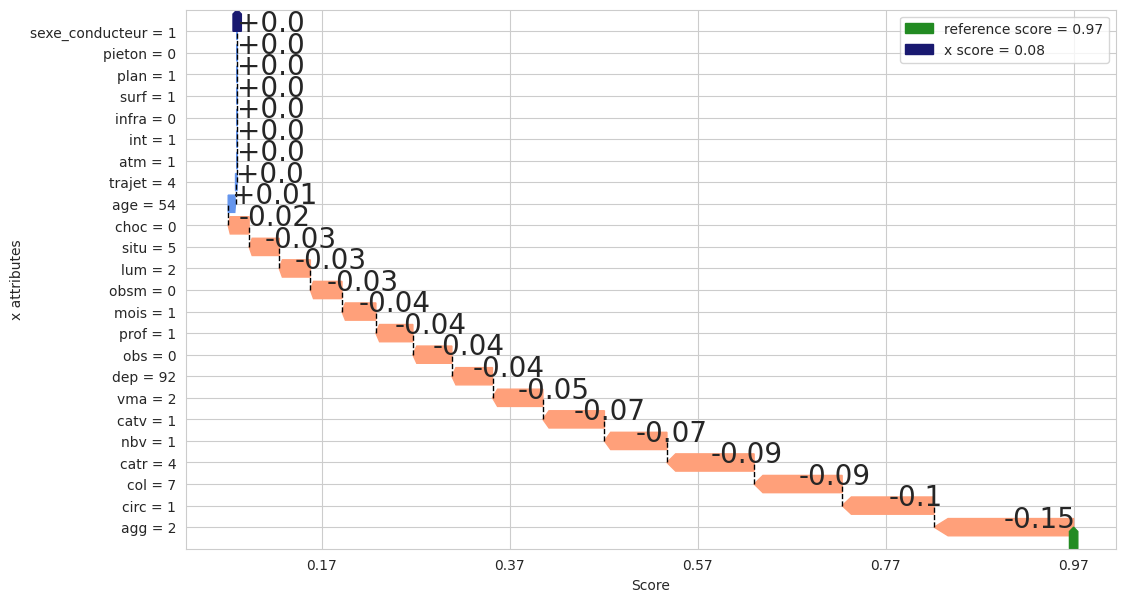

In [20]:
from shapkit.plots import plot_shapley

# Affichage des résultats
for i in range(0, 5):
    true_shap, query_instance, reference = s2.results[i]
    fig = plot_shapley(x=query_instance, fc=s2.fc, ref=reference, shapley_values=true_shap, n_attributes=24)

In [21]:
from BlackBoxAuditing.data import load_from_file
from BlackBoxAuditing.model_factories.AbstractModelFactory import AbstractModelFactory
from BlackBoxAuditing.model_factories.AbstractModelVisitor import AbstractModelVisitor

import BlackBoxAuditing as BBA


(_, train_BBA, _, _, _, _) = load_from_file("train_data.csv",
                      correct_types = np.repeat([int], [len(data_test.columns)]),
                                response_header = 'Y',
                               train_percentage = 1.0)
(headers, _, test_BBA, response_header, features_to_ignore, correct_types) = load_from_file("test_data.csv",
                      correct_types = np.repeat([int], [len(data_test.columns)]),
                                response_header = 'Y',
                               train_percentage = 0.0)
BBA_data = (headers, train_BBA, test_BBA, response_header, features_to_ignore, correct_types)

In [22]:
class HirePredictorBuilder(AbstractModelFactory):
    def __init__(self, *args, **kwargs):
        AbstractModelFactory.__init__(self, *args, **kwargs)
        self.verbose_factory_name = "HirePredictor"
    def build(self, train_set):
        return HirePredictor()

class HirePredictor(AbstractModelVisitor):
    def __init__(self):
        with open( 'clf.pickle', 'rb' ) as f:
            self.clf = pickle.load(f)

    def test(self, test_set, test_name=""):
        df_test = pd.DataFrame(
            test_set, columns =data_test.columns.to_list())
        targets = df_test['Y']
        preds = self.clf.predict(df_test.drop('Y', axis=1))
        return [[a,b] for (a,b) in zip(targets, preds)]

In [23]:
auditor = BBA.Auditor()
auditor.ModelFactory = HirePredictorBuilder
auditor(BBA_data, output_dir = "audit-output")

Training initial model. (19:02:43)
Calculating original model statistics on test data:
	Training Set:
		Conf-Matrix: {0: {0: 58609, 1: 230}, 1: {1: 3365}}
		accuracy: 0.9963024885859431
		BCR: 0.9980455140298101
	Testing Set:
		Conf-Matrix {0: {0: 26016, 1: 2701}, 1: {0: 1009, 1: 684}}
		accuracy: 0.8780006576783953
		BCR: 0.654980376458612
Auditing: 'trajet' (1/24). (19:02:47)
Auditing: 'catr' (2/24). (19:03:17)
Auditing: 'circ' (3/24). (19:03:49)
Auditing: 'nbv' (4/24). (19:04:21)
Auditing: 'prof' (5/24). (19:04:54)
Auditing: 'plan' (6/24). (19:05:30)
Auditing: 'surf' (7/24). (19:06:04)
Auditing: 'infra' (8/24). (19:06:41)
Auditing: 'situ' (9/24). (19:07:17)
Auditing: 'vma' (10/24). (19:07:55)
Auditing: 'mois' (11/24). (19:08:28)
Auditing: 'lum' (12/24). (19:08:55)
Auditing: 'dep' (13/24). (19:09:28)
Auditing: 'agg' (14/24). (19:09:56)
Auditing: 'int' (15/24). (19:10:30)
Auditing: 'atm' (16/24). (19:11:04)
Auditing: 'col' (17/24). (19:11:41)
Auditing: 'catv' (18/24). (19:12:10)
Audit